# Neural Networks for MNIST dataset

In [4]:
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import Dataset
import numpy as np
import pandas as pd

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

## Loading MNIST
Here we load the dataset and create data loaders.

In [6]:
train_ds = datasets.MNIST('data', train=True, download=True, 
                       transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))

test_ds = datasets.MNIST('data', train=False, download=True, 
                       transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.1307,), (0.3081,))
                   ]))


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw




Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Processing...
Done!


/opt/anaconda3/lib/python3.8/site-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
batch_size = 32
#batch_size = 5 # for testing
kwargs = {'num_workers': 1, 'pin_memory': True} 

train_loader = torch.utils.data.DataLoader(train_ds, batch_size=batch_size, shuffle=True, **kwargs)
test_loader = torch.utils.data.DataLoader(test_ds, batch_size=batch_size, shuffle=False, **kwargs)

## Looking at Examples

In [9]:
train_dl = iter(train_loader)
x, y = next(train_dl)

In [14]:
print(x.shape, y.shape)

torch.Size([32, 1, 28, 28]) torch.Size([32])


Looking are images

In [15]:
def show(img, title=None):
    plt.imshow(img, interpolation='none', cmap="gray")
    if title is not None: plt.title(title)

In [16]:
# first from torch to numpy
X = x.numpy(); Y = y.numpy()
X.shape

(32, 1, 28, 28)

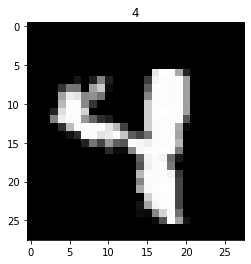

In [17]:
show(X[0][0], Y[0])

## Feed Forward Neural Network

In [ ]:
# for the number of neurons in the hidden unit
def get_model(M = 300):
    net = nn.Sequential(nn.Linear(28*28, M),
                        nn.ReLU(),
                        nn.Linear(M, 10))
    return net #.cuda()

In [ ]:
def train_model(train_loader, test_loader, num_epochs, model, optimizer):
    model.train()
    for epoch in range(num_epochs):
        sum_loss = 0.0
        total = 0
        for i, (images, labels) in enumerate(train_loader):  
            batch = images.shape[0] # size of the batch
            # Convert torch tensor to Variable, change shape of the input
            images = images.view(-1, 28*28) #.cuda()
        
            # Forward + Backward + Optimize
            optimizer.zero_grad()  # zero the gradient buffer
            outputs = model(images)
            loss = F.cross_entropy(outputs, labels)
            loss.backward()
            optimizer.step()
        
            total += batch
            sum_loss += batch * loss.item()
                
        train_loss = sum_loss/total
        print('Epoch [%d/%d], Loss: %.4f' %(epoch+1, num_epochs, train_loss))
        val_acc, val_loss = model_accuracy_loss(model, test_loader)
        print('Epoch [%d/%d], Valid Accuracy: %.4f, Valid Loss: %.4f' %(epoch+1, num_epochs, val_acc, val_loss))
    return val_acc, val_loss, train_loss

In [17]:
def model_accuracy_loss(model, test_loader):
    model.eval()
    correct = 0
    sum_loss = 0.0
    total = 0
    for images, labels in test_loader:
        images = images.view(-1, 28*28)  #.cuda()
        outputs = model(images)
        _, pred = torch.max(outputs.data, 1)
        loss = F.cross_entropy(outputs, labels)
        sum_loss += labels.size(0)*loss.item()
        total += labels.size(0)
        correct += pred.eq(labels.data).sum().item()
    return 100 * correct / total, sum_loss/ total

In [18]:
# net = get_model()
# learning_rate = 0.01
# optimizer = optim.Adam(net.parameters(), lr=learning_rate)
# model_accuracy_loss(net, test_loader)

(8.71, 2.3597292488098143)

# Question 1) 


## The validation accuracy was terrible for learning rates of 1 and 0.1; however, the accuracy shot up to ~90% after lowering the learning rate to 0.01. 
## The table below shows that the best learning rate is **between 0.001 and 0.0001**

In [24]:
df_1 = pd.DataFrame({'lr': learning_rates, 'accuracy': scores})
df_1

,lr,accuracy
0,1.00000,9.90
1,0.10000,11.36
2,0.01000,93.84
3,0.00100,97.61
4,0.00010,98.07
5,0.00001,93.67


In [22]:
learning_rates = [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]
scores = []
for lr in learning_rates:
    net = get_model()
    optimizer = optim.Adam(net.parameters(), lr=lr)
    val_acc, val_loss, train_loss = train_model(train_loader, test_loader, 
                                                num_epochs=10, model=net, 
                                                optimizer=optimizer)
    scores.append(val_acc)
    

df_1 = pd.DataFrame({'lr': learning_rates, 'accuracy': scores})
df_1

Epoch [1/10], Loss: 71.5266
Epoch [1/10], Valid Accuracy: 10.3600, Valid Loss: 3.5832
Epoch [2/10], Loss: 4.0942
Epoch [2/10], Valid Accuracy: 11.4400, Valid Loss: 2.4205
Epoch [3/10], Loss: 2.4049
Epoch [3/10], Valid Accuracy: 10.1800, Valid Loss: 2.3631
Epoch [4/10], Loss: 2.4120
Epoch [4/10], Valid Accuracy: 10.1900, Valid Loss: 2.4910
Epoch [5/10], Loss: 2.4028
Epoch [5/10], Valid Accuracy: 10.1800, Valid Loss: 2.4416
Epoch [6/10], Loss: 2.4125
Epoch [6/10], Valid Accuracy: 10.1900, Valid Loss: 2.3828
Epoch [7/10], Loss: 2.4076
Epoch [7/10], Valid Accuracy: 9.9000, Valid Loss: 2.4219
Epoch [8/10], Loss: 2.4043
Epoch [8/10], Valid Accuracy: 11.4400, Valid Loss: 2.4740
Epoch [9/10], Loss: 2.4049
Epoch [9/10], Valid Accuracy: 9.8100, Valid Loss: 2.3791
Epoch [10/10], Loss: 2.4096
Epoch [10/10], Valid Accuracy: 9.9000, Valid Loss: 2.4724
Epoch [1/10], Loss: 2.8813
Epoch [1/10], Valid Accuracy: 13.5700, Valid Loss: 4.9234
Epoch [2/10], Loss: 2.2839
Epoch [2/10], Valid Accuracy: 12.4900,

NameError: name 'pd' is not defined

# 2) The best hidden layer size is    
## Some of the models are overfitting past epoch 5 which can be seen as the validation accuracy goes down in further epochs and the validation loss goes up


In [30]:
df_3

,decay,val_acc,val_loss,train_loss
0,0.0000,97.69,0.195473,0.015452
1,0.0001,97.73,0.109670,0.028258
2,0.0010,97.29,0.086315,0.066569
3,0.0100,95.72,0.156220,0.166869
4,0.1000,89.31,0.440048,0.467849
5,0.3000,84.42,0.800058,0.815454


In [26]:
neurons = [10, 50, 100, 300, 1000, 2000]
rows = []
for neuron in neurons:
    data = {}
    net = get_model(M=neuron)
    optimizer = optim.Adam(net.parameters(), lr=0.01)
    val_acc, val_loss, train_loss = train_model(train_loader, test_loader, 
                                            num_epochs=10, model=net, 
                                            optimizer=optimizer)
    data['neuron'] = neuron
    data['val_acc'] = val_acc
    data['val_loss'] = val_loss
    data['train_loss'] = train_loss
    rows.append(data)
        
        
df_2 = pd.DataFrame(rows)    
df_2
        

Epoch [1/10], Loss: 0.9859
Epoch [1/10], Valid Accuracy: 77.2100, Valid Loss: 0.7435
Epoch [2/10], Loss: 0.7655
Epoch [2/10], Valid Accuracy: 78.4900, Valid Loss: 0.7108
Epoch [3/10], Loss: 0.7201
Epoch [3/10], Valid Accuracy: 78.9300, Valid Loss: 0.6881
Epoch [4/10], Loss: 0.7031
Epoch [4/10], Valid Accuracy: 77.7600, Valid Loss: 0.7476
Epoch [5/10], Loss: 0.7004
Epoch [5/10], Valid Accuracy: 77.9900, Valid Loss: 0.7170
Epoch [6/10], Loss: 0.6981
Epoch [6/10], Valid Accuracy: 80.2000, Valid Loss: 0.6734
Epoch [7/10], Loss: 0.6973
Epoch [7/10], Valid Accuracy: 79.0800, Valid Loss: 0.7086
Epoch [8/10], Loss: 0.6943
Epoch [8/10], Valid Accuracy: 79.9000, Valid Loss: 0.6844
Epoch [9/10], Loss: 0.6870
Epoch [9/10], Valid Accuracy: 78.2200, Valid Loss: 0.7130
Epoch [10/10], Loss: 0.6916
Epoch [10/10], Valid Accuracy: 80.5900, Valid Loss: 0.6675
Epoch [1/10], Loss: 0.3318
Epoch [1/10], Valid Accuracy: 91.6800, Valid Loss: 0.2774
Epoch [2/10], Loss: 0.2666
Epoch [2/10], Valid Accuracy: 92.280

ValueError: If using all scalar values, you must pass an index

In [27]:
df_2 = pd.DataFrame(rows)    
df_2

,neuron,val_acc,val_loss,train_loss
0,10,80.59,0.667514,0.691556
1,50,92.98,0.363225,0.232805
2,100,94.08,0.304494,0.217970
3,300,94.18,0.327253,0.226029
4,1000,94.58,0.335383,0.212230
5,2000,94.01,0.310637,0.224147


# Question 3) Weight Decay
## The best validation accuracy was with weight decay of 0.0001. The validation accuracy is better with the highest being 97.73
To add L2 regularization use the `weight_decay` argument on the optimizer

In [18]:
# optimizer = optim.Adam(net.parameters(), lr=learning_rate, weight_decay = 0.01)

In [35]:
df_3


,decay,val_acc,val_loss,train_loss
0,0.0000,97.69,0.195473,0.015452
1,0.0001,97.73,0.109670,0.028258
2,0.0010,97.29,0.086315,0.066569
3,0.0100,95.72,0.156220,0.166869
4,0.1000,89.31,0.440048,0.467849
5,0.3000,84.42,0.800058,0.815454


In [28]:
# L2 weight decay rates
decays = [0, 0.0001, 0.001, 0.01, 0.1, 0.3]
rows = []
for decay in decays:
    data = {}
    net = get_model(M=neuron)
    optimizer = optim.Adam(net.parameters(), lr=0.001, weight_decay=decay)
    val_acc, val_loss, train_loss = train_model(train_loader, test_loader, 
                                            num_epochs=20, model=net, 
                                            optimizer=optimizer)
    data['decay'] = decay
    data['val_acc'] = val_acc
    data['val_loss'] = val_loss
    data['train_loss'] = train_loss
    rows.append(data)
        
        
df_3 = pd.DataFrame(rows) 
df_3

Epoch [1/20], Loss: 0.1840
Epoch [1/20], Valid Accuracy: 96.8300, Valid Loss: 0.1014
Epoch [2/20], Loss: 0.0888
Epoch [2/20], Valid Accuracy: 97.4000, Valid Loss: 0.0832
Epoch [3/20], Loss: 0.0638
Epoch [3/20], Valid Accuracy: 97.9000, Valid Loss: 0.0830
Epoch [4/20], Loss: 0.0484
Epoch [4/20], Valid Accuracy: 97.7500, Valid Loss: 0.0890
Epoch [5/20], Loss: 0.0422
Epoch [5/20], Valid Accuracy: 97.8900, Valid Loss: 0.0933
Epoch [6/20], Loss: 0.0371
Epoch [6/20], Valid Accuracy: 97.6300, Valid Loss: 0.1087
Epoch [7/20], Loss: 0.0298
Epoch [7/20], Valid Accuracy: 98.0600, Valid Loss: 0.0923
Epoch [8/20], Loss: 0.0313
Epoch [8/20], Valid Accuracy: 97.9600, Valid Loss: 0.1135
Epoch [9/20], Loss: 0.0278
Epoch [9/20], Valid Accuracy: 97.9300, Valid Loss: 0.1071
Epoch [10/20], Loss: 0.0254
Epoch [10/20], Valid Accuracy: 97.8500, Valid Loss: 0.1347
Epoch [11/20], Loss: 0.0253
Epoch [11/20], Valid Accuracy: 97.5700, Valid Loss: 0.1575
Epoch [12/20], Loss: 0.0241
Epoch [12/20], Valid Accuracy: 97

,decay,val_acc,val_loss,train_loss
0,0.0000,97.69,0.195473,0.015452
1,0.0001,97.73,0.109670,0.028258
2,0.0010,97.29,0.086315,0.066569
3,0.0100,95.72,0.156220,0.166869
4,0.1000,89.31,0.440048,0.467849
5,0.3000,84.42,0.800058,0.815454


In [32]:
def get_model_v2(M = 300, p=0):
    modules = []
    modules.append(nn.Linear(28*28, M))
    modules.append(nn.ReLU())
    if p > 0:
        modules.append(nn.Dropout(p))
    modules.append(nn.Linear(M, 10))
    return nn.Sequential(*modules) #.cuda()

In [20]:
net = get_model_v2(M = 300, p=0.1)
optimizer = optim.Adam(net.parameters(), lr=0.01)

# Question 4) Models with Dropout 

## The table below shows the train loss, validation loss, and validation accuracy for dropout rates of 0.1, 0.2, 0.3, 0.4
## Dropout rate of 0.7 performed the best. Literature says that the dropout rate between 0. and 0.5 works the best 


## The choice of dropout parameter affects the model similar to how trees in a random forest only see a subset of the features to prevent overfitting

## Compared to L2 regularization the validation accuracy scores are better; however, I only trained for 5 epochs due to the time constraints

In [37]:
        
df_4 = pd.DataFrame(rows) 
df_4

,dropout,val_acc,val_loss,train_loss
0,0.1,97.41,0.087582,0.039432
1,0.2,97.38,0.093658,0.039167
2,0.3,97.85,0.075085,0.040015
3,0.4,97.81,0.082086,0.042351
4,0.5,97.28,0.097819,0.040616
5,0.6,97.74,0.080882,0.041318
6,0.7,97.38,0.094288,0.046152
7,0.8,97.87,0.080707,0.047316
8,0.9,97.63,0.078330,0.053195


In [36]:
dropouts = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
rows = []
for p in dropouts:
    data = {}
    net = get_model_v2(M=300, p=p)
    optimizer = optim.Adam(net.parameters(), lr=0.001)
    val_acc, val_loss, train_loss = train_model(train_loader, test_loader, 
                                            num_epochs=5, model=net, 
                                            optimizer=optimizer)
    data['dropout'] = p
    data['val_acc'] = val_acc
    data['val_loss'] = val_loss
    data['train_loss'] = train_loss
    rows.append(data)
        
        
df_4 = pd.DataFrame(rows) 
df_4

Epoch [1/5], Loss: 0.2135
Epoch [1/5], Valid Accuracy: 96.4800, Valid Loss: 0.1113
Epoch [2/5], Loss: 0.0880
Epoch [2/5], Valid Accuracy: 97.1500, Valid Loss: 0.0873
Epoch [3/5], Loss: 0.0621
Epoch [3/5], Valid Accuracy: 97.2700, Valid Loss: 0.0893
Epoch [4/5], Loss: 0.0480
Epoch [4/5], Valid Accuracy: 97.3800, Valid Loss: 0.0925
Epoch [5/5], Loss: 0.0394
Epoch [5/5], Valid Accuracy: 97.4100, Valid Loss: 0.0876
Epoch [1/5], Loss: 0.2257
Epoch [1/5], Valid Accuracy: 95.8600, Valid Loss: 0.1274
Epoch [2/5], Loss: 0.0895
Epoch [2/5], Valid Accuracy: 97.5300, Valid Loss: 0.0782
Epoch [3/5], Loss: 0.0631
Epoch [3/5], Valid Accuracy: 97.4400, Valid Loss: 0.0880
Epoch [4/5], Loss: 0.0478
Epoch [4/5], Valid Accuracy: 97.7000, Valid Loss: 0.0757
Epoch [5/5], Loss: 0.0392
Epoch [5/5], Valid Accuracy: 97.3800, Valid Loss: 0.0937
Epoch [1/5], Loss: 0.2438
Epoch [1/5], Valid Accuracy: 96.7600, Valid Loss: 0.1078
Epoch [2/5], Loss: 0.0927
Epoch [2/5], Valid Accuracy: 97.3800, Valid Loss: 0.0813
Epoc

,dropout,val_acc,val_loss,train_loss
0,0.1,97.41,0.087582,0.039432
1,0.2,97.38,0.093658,0.039167
2,0.3,97.85,0.075085,0.040015
3,0.4,97.81,0.082086,0.042351
4,0.5,97.28,0.097819,0.040616
5,0.6,97.74,0.080882,0.041318
6,0.7,97.38,0.094288,0.046152
7,0.8,97.87,0.080707,0.047316
8,0.9,97.63,0.078330,0.053195
